<a href="https://colab.research.google.com/github/ajaynain-eng/Car-Damage-Detection/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import numpy as np
import json
from matplotlib import pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
import time

In [ ]:
!unzip '/content/Assignment-main.zip'

In [91]:
def raw_data(matadata_path):
    f = open(matadata_path)
    file = json.load(f)
    f.close()
    polygonlabels = list()
    polygoncorr = list()
    original_width = list()
    original_height = list()
    for dictionary in file:
        try:
            polygoncorr.append(dictionary['value']['points'])
            polygonlabels.append(dictionary['value']['polygonlabels'])
            original_width.append(dictionary['original_width'])
            original_height.append(dictionary['original_height'])
        except:
            pass
    return polygoncorr, original_width, original_height, polygonlabels

In [223]:
def get_poly_coordinates(polygoncorr, original_width, original_height):  
    new_poly = list()
    b_box = list()
    for i,lst in enumerate(polygoncorr):
        arr = np.array(lst)
        arr[:,0] = arr[:,0]*original_width[i]//100
        arr[:,1] = arr[:,1]*original_height[i]//100
        arr = np.int32(arr)
        b_box.append([[arr[:,0].min(), arr[:,1].min()], [arr[:,0].max(), arr[:,1].max()]])
        new_poly.append(arr)
    return b_box, new_poly

In [270]:
def draw_on_img(img_path, matadata_path):
    polygoncorr, original_width, original_height, polygonlabels = raw_data(matadata_path)
    b_box, polygon_corr = get_poly_coordinates(polygoncorr, original_width, original_height)
    img = plt.imread(img_path)
    for corr, box, label in zip(polygon_corr, b_box, polygonlabels):
        cv2.polylines(img, [corr], isClosed = True, color = (30,10,255), thickness = 1, lineType = cv2.LINE_AA)
        cv2.rectangle(img, tuple(box[0]), tuple(box[1]),  (0,255,0), thickness = 2)
        org = tuple(box[0])
        cv2.putText(img, label[0], org, cv2.FONT_HERSHEY_SIMPLEX , 0.4, (20,0,20), 1)

    cv2_imshow(img)
    return img

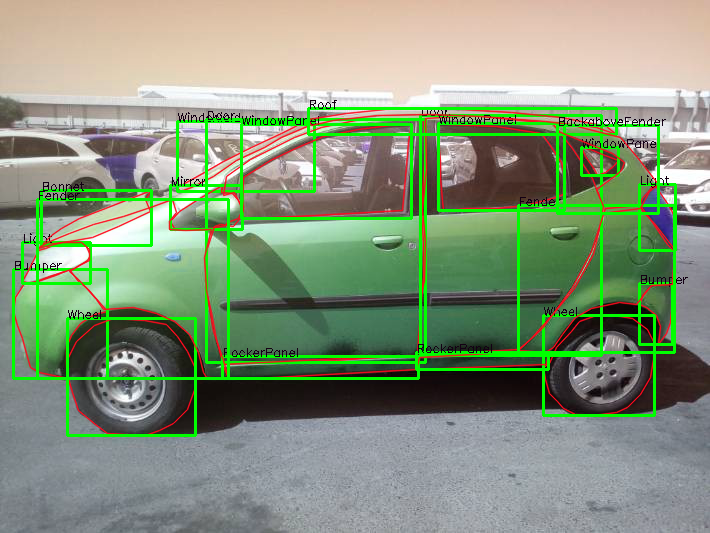

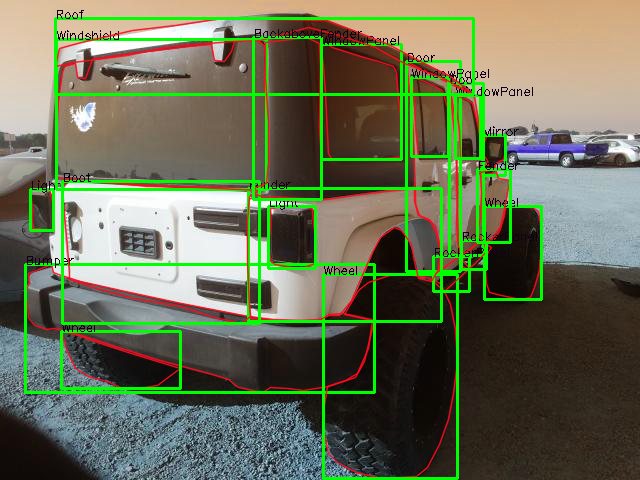

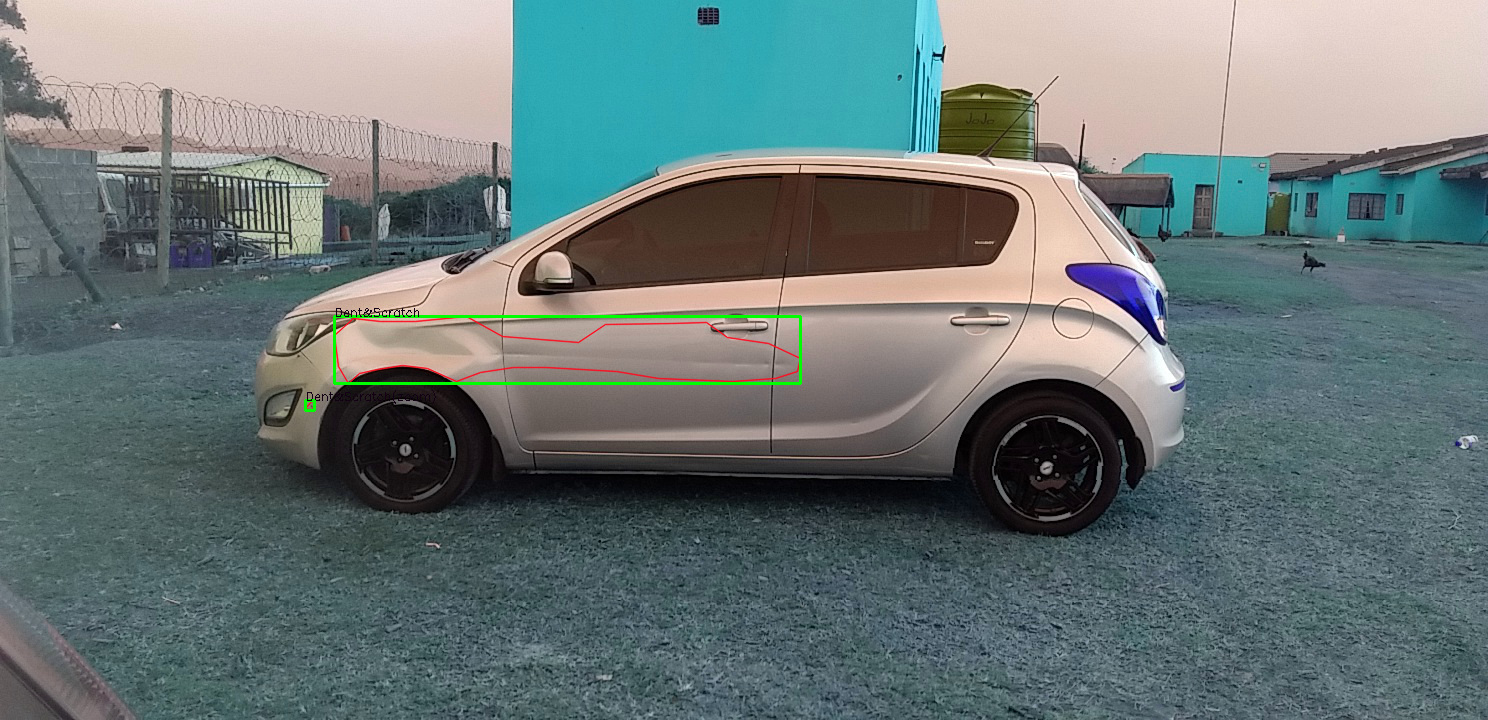

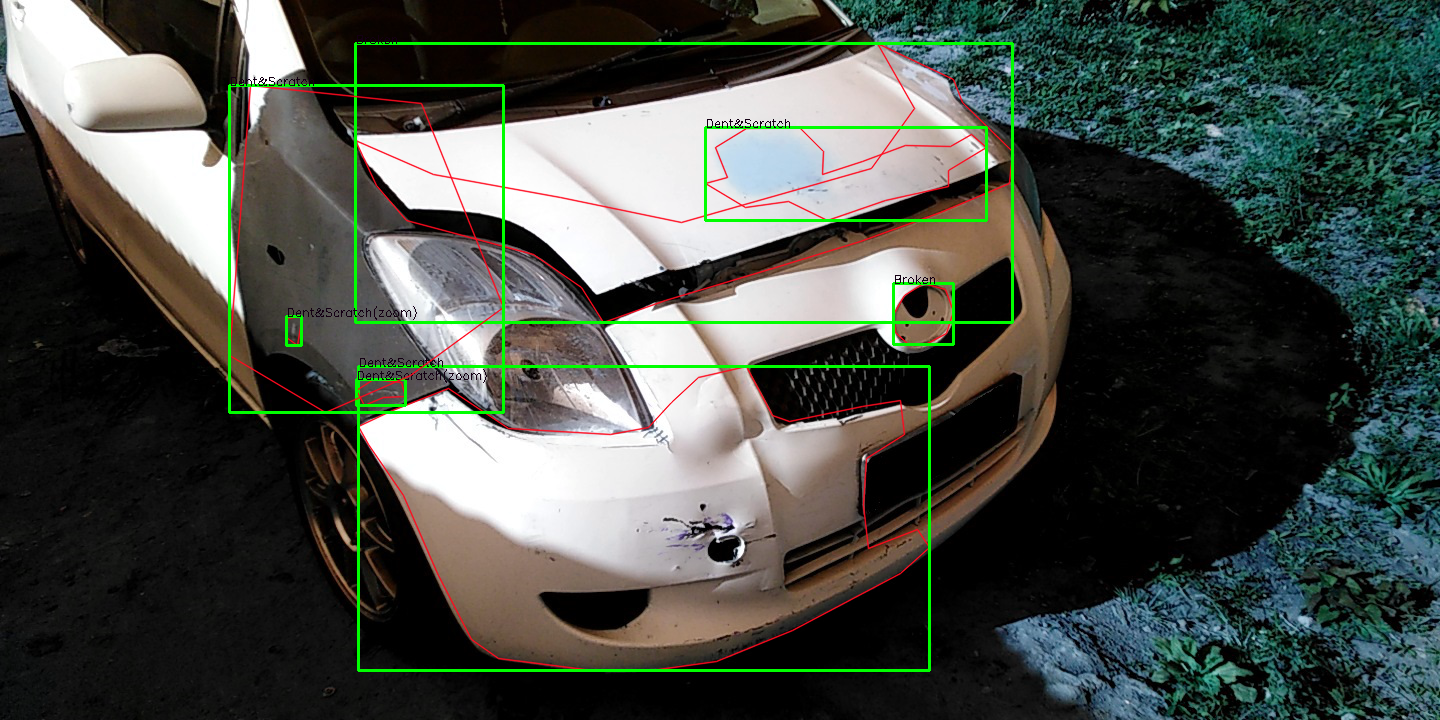

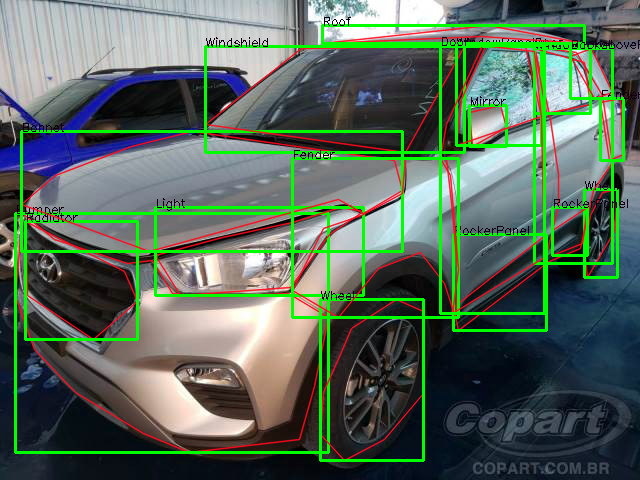

In [271]:
img_base_path = '/content/Assignment-main/Data Visualization/images'
metadata_base_path = '/content/Assignment-main/Data Visualization/data'
imgs = os.listdir(img_base_path)
imgs.sort()
metadata = os.listdir(metadata_base_path)
metadata.sort()
for img, meta_data in zip(imgs, metadata):
    img_path = os.path.join(img_base_path, img)
    metadata_path = os.path.join(metadata_base_path, meta_data)
    draw_on_img(img_path, metadata_path)
    # time.sleep(20)